# MNIST

MNIST 是手写数字图片数据集，包含 60000 张训练样本和 10000 张测试样本。

![MNIST](https://s1.ax1x.com/2020/10/07/0aK8ht.png)

MNIST 数据集来自美国国家标准与技术研究所，National Institute of Standards and Technology(NIST)。现在你是不是知道这个数据集名字的由来了。M 是 Modified 的缩写。训练集是由来自 250 个不同人手写的数字构成，其中50%是高中学生，50%来自人口普查局的工作人员。测试集也是同样比例的手写数字数据。每张图片有28x28个像素点构成，每个像素点用一个灰度值表示，这里是将 28x28 的像素展开为一个一维的行向量（每行784个值）。图片标签为 one-hot 编码：0-9。


In [1]:
import  tensorflow as tf
from    tensorflow.keras import datasets, layers, optimizers, Sequential, metrics

(xs, ys),_ = datasets.mnist.load_data()
print('datasets:', xs.shape, ys.shape, xs.min(), xs.max())

datasets: (60000, 28, 28) (60000,) 0 255


In [2]:
xs = tf.convert_to_tensor(xs, dtype=tf.float32) / 255.
db = tf.data.Dataset.from_tensor_slices((xs,ys))
db = db.batch(32).repeat(10)

network = Sequential([layers.Dense(256, activation='relu'),
                     layers.Dense(256, activation='relu'),
                     layers.Dense(256, activation='relu'),
                     layers.Dense(10)])
network.build(input_shape=(None, 28*28))
network.summary()

optimizer = optimizers.SGD(lr=0.01)
acc_meter = metrics.Accuracy()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [3]:
for step, (x,y) in enumerate(db):

    with tf.GradientTape() as tape:
        # [b, 28, 28] => [b, 784]
        x = tf.reshape(x, (-1, 28*28))
        # [b, 784] => [b, 10]
        out = network(x)
        # [b] => [b, 10]
        y_onehot = tf.one_hot(y, depth=10)
        # [b, 10]
        loss = tf.square(out-y_onehot)
        # [b]
        loss = tf.reduce_sum(loss) / 32

    acc_meter.update_state(tf.argmax(out, axis=1), y)

    grads = tape.gradient(loss, network.trainable_variables)
    optimizer.apply_gradients(zip(grads, network.trainable_variables))

    if step % 200==0:

        print(step, 'loss:', float(loss), 'acc:', acc_meter.result().numpy())
        acc_meter.reset_states()

0 loss: 1.4306284189224243 acc: 0.0625
200 loss: 0.4448701739311218 acc: 0.68640625
400 loss: 0.3747585415840149 acc: 0.843125
600 loss: 0.3297494351863861 acc: 0.8715625
800 loss: 0.25796979665756226 acc: 0.9010937
1000 loss: 0.31862908601760864 acc: 0.9
1200 loss: 0.2641947269439697 acc: 0.9146875
1400 loss: 0.1903838813304901 acc: 0.9215625
1600 loss: 0.22767513990402222 acc: 0.915
1800 loss: 0.19204671680927277 acc: 0.9315625
2000 loss: 0.19200192391872406 acc: 0.9421875
2200 loss: 0.14366909861564636 acc: 0.93171877
2400 loss: 0.22292569279670715 acc: 0.929375
2600 loss: 0.1871187388896942 acc: 0.93859375
2800 loss: 0.1343429684638977 acc: 0.9401562
3000 loss: 0.22224950790405273 acc: 0.9375
3200 loss: 0.16576802730560303 acc: 0.94390625
3400 loss: 0.12804614007472992 acc: 0.9384375
3600 loss: 0.11516376584768295 acc: 0.9403125
3800 loss: 0.16437432169914246 acc: 0.9571875
4000 loss: 0.18683916330337524 acc: 0.95390624
4200 loss: 0.15023627877235413 acc: 0.9423438
4400 loss: 0.140

# Fashion MNIST

Fashion-MNIST 是一个替代MNIST手写数字集的图像数据集。 它是由Zalando（一家德国的时尚科技公司）旗下的研究部门提供。其涵盖了来自10种类别的共7万个不同商品的正面图片。Fashion-MNIST的大小、格式和训练集/测试集划分与原始的MNIST完全一致。60000/10000的训练测试数据划分，28x28的灰度图片。你可以直接用它来测试你的机器学习和深度学习算法性能，且不需要改动任何的代码。

![fashion-mnist-sprite](https://tensorflow.google.cn/images/fashion-mnist-sprite.png)

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

In [2]:
# Load the dataset: Fashion MNIST
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)

4423680/4422102 [==============================] - 0s 0us/step
(10000, 784)
(10000,)


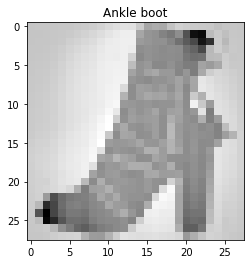

In [3]:
# Plot one of the data
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

![](https://github.com/thibo73800/tensorflow2.0-examples/raw/75af5fe0a2cc6744c020bb5cc4bbf552f225298f/images/simple_nn.png)

In [4]:
# Flatten
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.08722198 0.10878643 0.03967797 0.05929448 0.00588827 0.48148462
  0.02125843 0.08187865 0.06266229 0.05184688]] [9]


In [5]:
# 三个全连接层
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

history = model.fit(images, targets, epochs=10, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.8657 - accuracy: 0.7151 - val_loss: 0.6111 - val_accuracy: 0.7800
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5224 - accuracy: 0.8135 - val_loss: 0.5114 - val_accuracy: 0.8140
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.8428 - val_loss: 0.4738 - val_accuracy: 0.8230
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3963 - accuracy: 0.8606 - val_loss: 0.4615 - val_accuracy: 0.8300
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3634 - accuracy: 0.8744 - val_loss: 0.4321 - val_accuracy: 0.8435
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3365 - accuracy: 0.8821 - val_loss: 0.4225 - val_accuracy: 0.8480
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3143 - accuracy: 0.8936 - val_loss: 0.4191 - val_accuracy: 0.8500
Epoch 

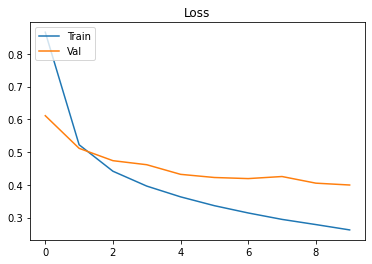

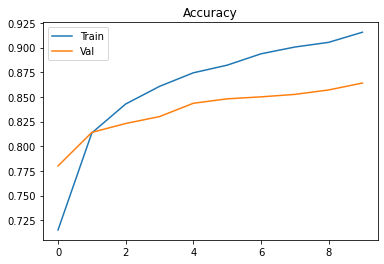

In [9]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [10]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8464
Test Loss 0.4412473738193512
Test Accuracy 0.8464000225067139
